In [2]:
import pandas as pd

order_items = pd.read_csv("data/raw/olist_order_items_dataset.csv.csv")
products = pd.read_csv("data/raw/olist_products_dataset.csv.csv")


In [3]:
df = pd.merge(order_items, products, on="product_id", how="left")

In [4]:
category_perf = df.groupby("product_category_name").agg(
    total_orders=("order_id", "count"),
    total_revenue=("price", "sum"),
    avg_order_value=("price", "mean")
).reset_index()


category_perf["total_revenue"] = category_perf["total_revenue"].round(2)
category_perf["avg_order_value"] = category_perf["avg_order_value"].round(2)


category_perf.sort_values("total_revenue", ascending=False, inplace=True)
category_perf.head(10)


,product_category_name,total_orders,total_revenue,avg_order_value
11,beleza_saude,9670,1258681.34,130.16
66,relogios_presentes,5991,1205005.68,201.14
13,cama_mesa_banho,11115,1036988.68,93.30
32,esporte_lazer,8641,988048.97,114.34
44,informatica_acessorios,7827,911954.32,116.51
54,moveis_decoracao,8334,729762.49,87.56
26,cool_stuff,3796,635290.85,167.36
72,utilidades_domesticas,6964,632248.66,90.79
8,automotivo,4235,592720.11,139.96
40,ferramentas_jardim,4347,485256.46,111.63


C:\Users\lahit\AppData\Local\Temp\ipykernel_12680\2714545357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x="total_revenue", y="product_category_name", palette="viridis")


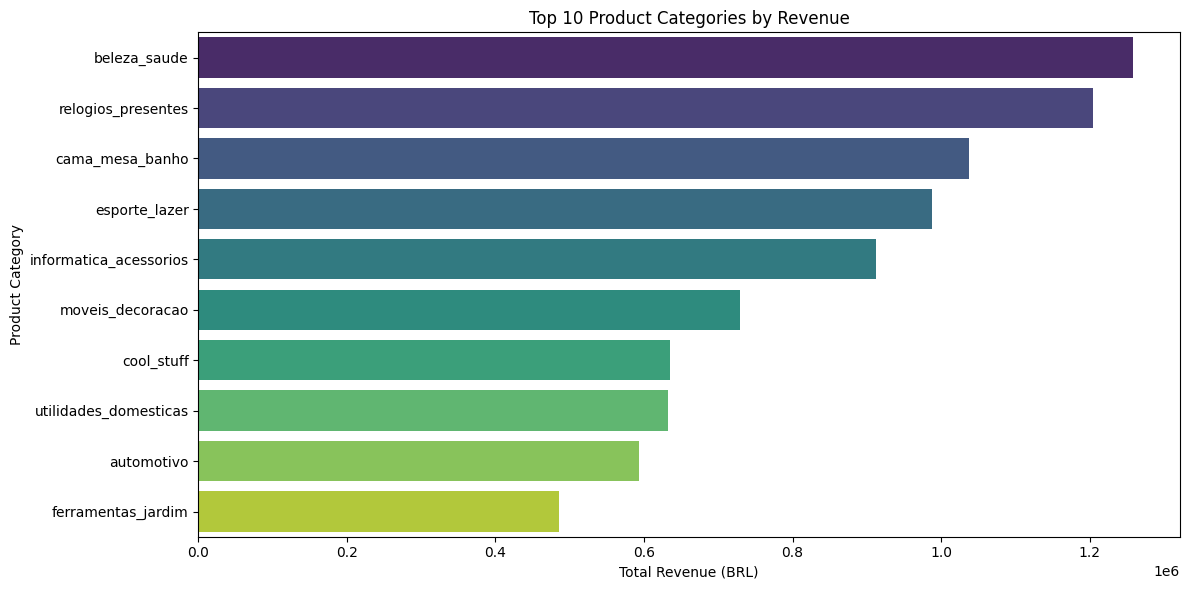

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

top_categories = category_perf.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x="total_revenue", y="product_category_name", palette="viridis")
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue (BRL)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()
